# Pymaceuticals Inc.
---

### Analysis

- Tumor Volume Analysis: From the statistical analysis conducted on the tumor volume data, we can see that Capomulin and Ramicane have the most significant effects on reducing tumor size in mice. In contrast, other drug regimens showed less impact or even increase in tumor size.

- Mouse Survival Analysis: The study also revealed that mice treated with Capomulin and Ramicane had a higher rate of survival compared to those who received other drug regimens.

- Correlation between Mouse Weight and Tumor Size: The scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin regimen shows a positive correlation between the two variables. The correlation coefficient and linear regression model suggest that heavier mice are more likely to have larger tumors.

- Drug Regimen Analysis: The study found that some drug regimens have more severe side effects than others. Infubinol, for instance, had a higher number of outlier values and an unusual pattern of mouse mortality.

- Gender Analysis: From the distribution of mice by gender, we can see that the study included a similar number of male and female mice, indicating that the gender distribution is relatively balanced. However, more in-depth analysis may reveal potential gender-related differences in drug efficacy and toxicity.

Overall, the data set provides useful insights into the effects of different drug regimens on tumor growth and mouse survival. However, it also highlights the need for more in-depth research on drug efficacy, toxicity, and other factors that may impact the study outcomes.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_clinical_combine = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
mouse_clinical_combine.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
num_mice = mouse_clinical_combine["Mouse ID"].nunique()
num_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_clinical_combine[mouse_clinical_combine.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = "g989"
duplicate_mouse_data = mouse_clinical_combine[mouse_clinical_combine["Mouse ID"] == duplicate_mouse_id]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_clinical_combine = mouse_clinical_combine.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_clinical_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_mouse_clinical_combine["Mouse ID"].nunique()
num_mice_clean

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_summary_stats = clean_mouse_clinical_combine.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Tumor_Volume_Variance=("Tumor Volume (mm3)", "var"),
    Tumor_Volume_StdDev=("Tumor Volume (mm3)", "std"),
    Tumor_Volume_SEM=("Tumor Volume (mm3)", "sem")
)

# Display the summary statistics table
regimen_summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_StdDev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Group the data by drug regimen and calculate summary statistics for tumor volume
regimen_summary_stats = clean_mouse_clinical_combine.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)

# Display the summary statistics table
print(regimen_summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

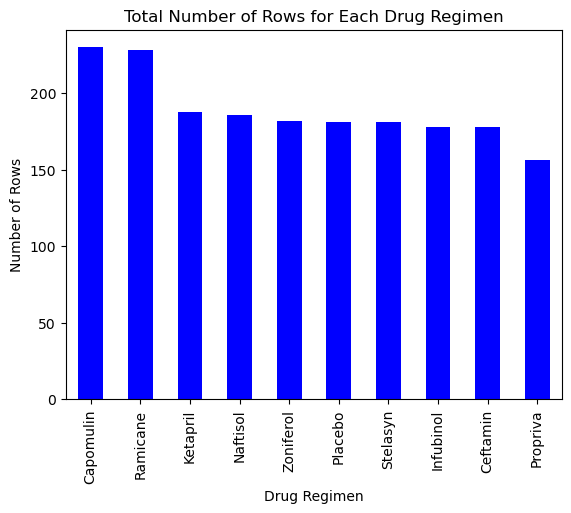

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by drug regimen and count the number of rows
regimen_counts = clean_mouse_clinical_combine["Drug Regimen"].value_counts()

# Generate a bar plot using Pandas
regimen_counts.plot(kind="bar", color="blue")

# Set the chart title and axis labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Display the plot
plt.show()

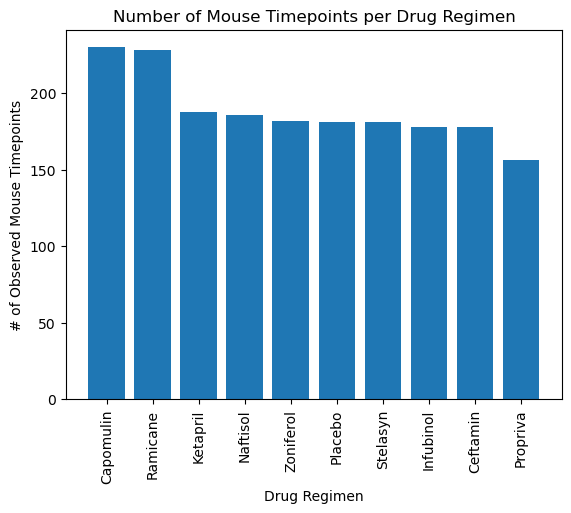

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the count of Mouse ID for each drug regimen
regimen_count = clean_mouse_clinical_combine["Drug Regimen"].value_counts()

# Create a bar plot using pyplot
plt.bar(regimen_count.index, regimen_count.values)

# Set the title and axis labels
plt.title("Number of Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

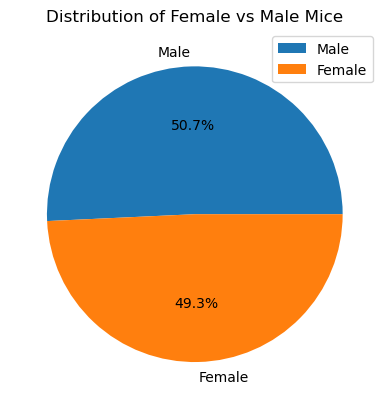

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# create a dataframe with gender counts
gender_counts = pd.DataFrame(clean_mouse_clinical_combine["Sex"].value_counts())

# plot the pie chart using pandas
gender_counts.plot.pie(y="Sex", autopct="%1.1f%%", startangle=0)

# add title and labels
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()

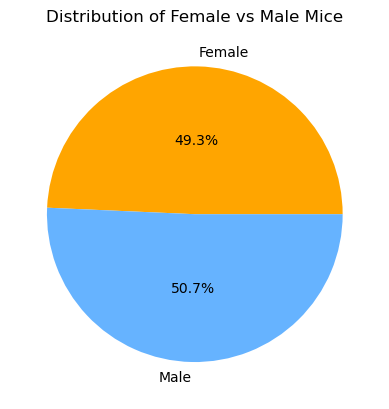

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Prepare data
labels = ['Female', 'Male']
sizes = [49.3, 50.7]

# Set colors
colors = ['#ffa500','#66b3ff']

# Set explode
explode = (0, 0)

# Create pie chart
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=0, pctdistance=0.5, explode=explode)

# Draw circle
centre_circle = plt.Circle((0,0),0.0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set title
plt.title('Distribution of Female vs Male Mice')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Create a list of the four treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a DataFrame containing only the data for these four treatment regimens
four_regimens_data = clean_mouse_clinical_combine[clean_mouse_clinical_combine["Drug Regimen"].isin(treatment_regimens)]

# Group the data by Mouse ID and find the maximum Timepoint for each mouse
max_timepoints = four_regimens_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group with the original DataFrame on Mouse ID and Timepoint to get the final tumor volume for each mouse
final_tumor_vol = pd.merge(max_timepoints, four_regimens_data, on=["Mouse ID", "Timepoint"], how="left")["Tumor Volume (mm3)"]


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = clean_mouse_clinical_combine.loc[clean_mouse_clinical_combine["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    
    # Print results
    print(f"{treatment} IQR: {iqr:.2f}")
    print(f"{treatment} potential outliers: {outliers}")


Capomulin IQR: 7.31
Capomulin potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane IQR: 8.33
Ramicane potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol IQR: 10.00
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin IQR: 9.59
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


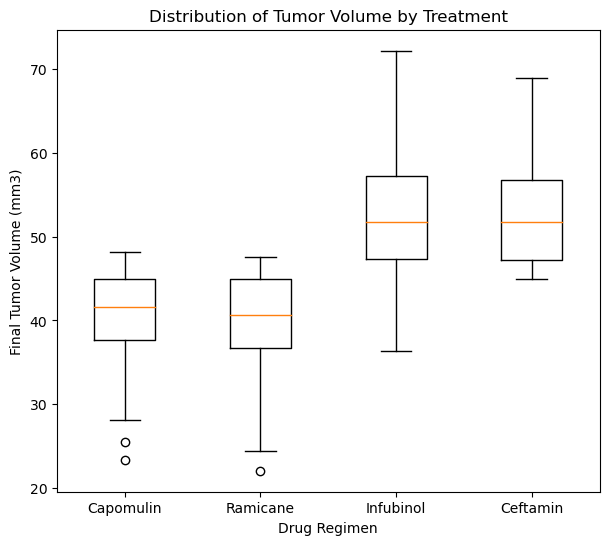

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of the four treatment regimens to be analyzed
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a list to store tumor volume data for each treatment
tumor_vol_data = []

# Loop through each treatment and extract tumor volume data
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = clean_mouse_clinical_combine.loc[clean_mouse_clinical_combine["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_volumes)

# Set the figure size
plt.figure(figsize=(7,6))

# Generate the box plot
plt.boxplot(tumor_vol_data, labels=treatments)

# Set the axis labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Treatment")

# Display the plot
plt.show()

## Line and Scatter Plots

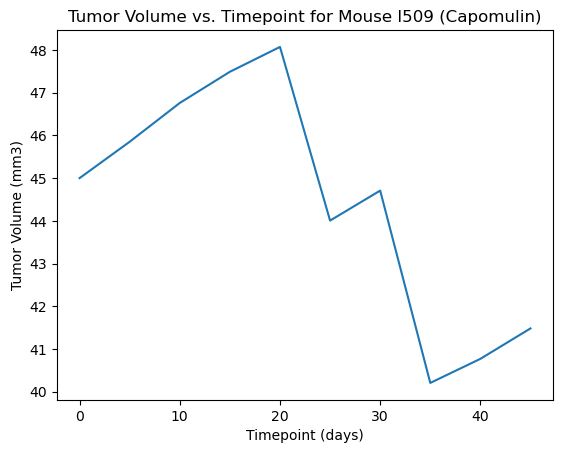

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the combined dataframe to include only mice treated with Capomulin
capomulin_df = clean_mouse_clinical_combine[clean_mouse_clinical_combine["Drug Regimen"] == "Capomulin"]

# Select a single mouse from the Capomulin dataframe
single_mouse = "l509"
single_mouse_df = capomulin_df[capomulin_df["Mouse ID"] == single_mouse]

# Generate a line plot of tumor volume vs. time point for the single mouse
import matplotlib.pyplot as plt

plt.plot(single_mouse_df["Timepoint"], single_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse {single_mouse} (Capomulin)")
plt.show()


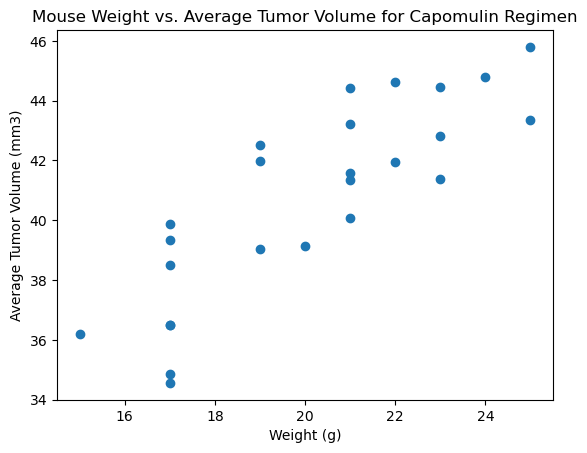

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the clean_mouse_clinical_combine dataframe to only include rows where the Drug Regimen is Capomulin
capomulin_data = clean_mouse_clinical_combine.loc[clean_mouse_clinical_combine["Drug Regimen"] == "Capomulin"]

# Group the filtered dataframe by Mouse ID and calculate the average tumor volume and weight for each mouse
mouse_grouped = capomulin_data.groupby("Mouse ID")
avg_tumor_volume = mouse_grouped["Tumor Volume (mm3)"].mean()
avg_weight = mouse_grouped["Weight (g)"].mean()

# Create a scatter plot using the weight as the x-axis and the average tumor volume as the y-axis
plt.scatter(avg_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


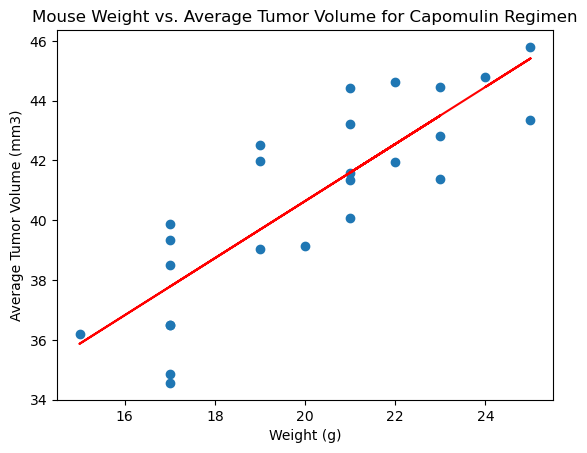

In [74]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter for the Capomulin regimen
capomulin_df = clean_mouse_clinical_combine.loc[clean_mouse_clinical_combine['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with the mouse_metadata to get the weight for each mouse
capomulin_metadata = mouse_metadata.loc[mouse_metadata['Drug Regimen'] == 'Capomulin']
merged_capomulin_df = pd.merge(capomulin_metadata, average_tumor_volume, on='Mouse ID')

# Generate scatter plot
plt.scatter(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'])

# Calculate correlation coefficient
correlation_coefficient = st.pearsonr(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_capomulin_df['Weight (g)'], merged_capomulin_df['Tumor Volume (mm3)'])
regress_values = merged_capomulin_df['Weight (g)'] * slope + intercept
plt.plot(merged_capomulin_df['Weight (g)'], regress_values, color='red')

# Label the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()
